## 🖼️ Analyze Images

**Vision** is the ability for a model to *"see"* and understand images. This includes:

- 🧠 Understanding **text** within images
- 🔍 Recognizing **objects**, **shapes**, **colors**, and **textures**
- 📸 Making sense of various **visual elements**

While models are powerful in visual comprehension, be aware that there are some **limitations** in complex scenes or ambiguous visuals.


In [1]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

!pip install openai
!pip install gradio

# Clean up the notebook
clean_notebook()

Notebook cleaned.


In [2]:
import os
from openai import OpenAI
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

True

# 1.Image Analysis with passing URLs

```python

In [11]:
import os
from openai import OpenAI

# Initialize client
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# Define model
model_name = "gpt-4.1-mini"  

# Create chat completion with image input
response = client.chat.completions.create(
    model=model_name,
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "What's in this image? in thai language"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"
                    },
                },
            ],
        }
    ],
)

# Print the assistant's reply
print(response.choices[0].message.content)


ในภาพนี้มีทางเดินไม้ทอดยาวผ่านทุ่งหญ้าสีเขียวกว้างใหญ่ฟ้าสีฟ้าพร้อมเมฆบางส่วนและต้นไม้ในระยะไกล


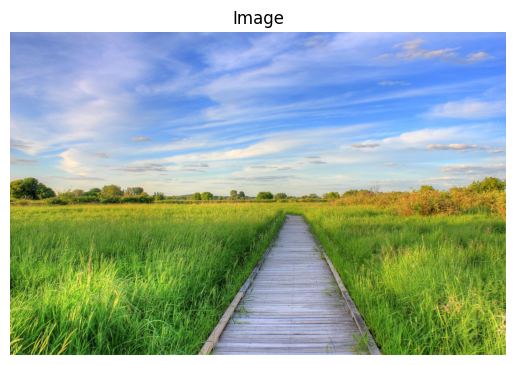

In [12]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

image = Image.open(BytesIO(requests.get("https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg").content))
plt.imshow(image)
plt.title(f"Image")
plt.axis('off')
plt.show()

## 1.1 Analyze images using URLs with multiple images


Analyzing image 1...

Assistant: ภาพนี้เป็นโจทย์และวิธีการแก้ปัญหาทางฟิสิกส์เกี่ยวกับการหาคำนวณระยะทางแบบเวกเตอร์หรือการหาการกระจัด (displacement) ของรถยนต์ที่วิ่งจากบ้านไปโรงเรียน

รายละเอียดในภาพมีดังนี้:

- ข้อความโจทย์: "นักเรียนคันหนึ่งขับรถไปโรงเรียน เริ่มโดยขับรถไปทางเหนือเป็นระยะทาง 8.33 กิโลเมตร จากนั้นเลี้ยวไปทางตะวันออกขับอีก 3.67 กิโลเมตร จงหาค่าของการกระจัดของรถ"

- ภาพมีการวาดรูปสามเหลี่ยมมุมฉาก โดยด้านข้างสองด้านคือ 8.33 กม. ทางเหนือ (b) และ 3.67 กม. ทางตะวันออก (a)

- ใช้สูตรพีทาโกรัสในการหาด้านตรงข้ามมุมฉาก (c) ซึ่งคือการกระจัดของรถ: c = √(a² + b²)

- คำนวณโดยแสดงค่า: c = √((3.67 km)² + (8.33 km)²) = √(13.5 + 69.4) = 9.10 km

- คำตอบสุดท้ายคือ การกระจัดของรถยนต์คันนี้เท่ากับประมาณ 9.10 กิโลเมตร

สรุปก็คือภาพนี้เป็นตัวอย่างการประยุกต์ใช้ทฤษฎีบทพีทาโกรัสเพื่อหาค่าการกระจัดในปัญหาตำแหน่งและเวกเตอร์ค่ะ


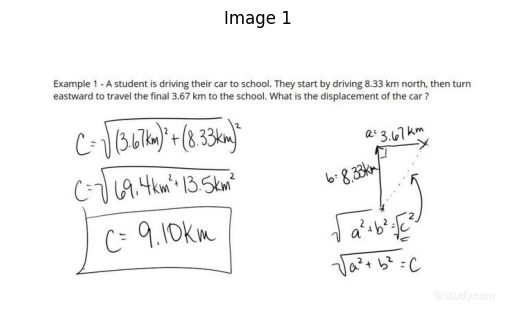


Analyzing image 2...

Assistant: ภาพนี้เป็นกราฟแสดงความสัมพันธ์ระหว่าง "อัตราส่วน P/E (Price to Earnings ratio) ของดัชนี S&P 500" กับ "อัตราดอกเบี้ยของสหรัฐฯ" ระหว่างปี ค.ศ. 1881 ถึง 2008

รายละเอียดของกราฟ:
- เส้นสีแดงแทนค่าอัตราส่วน P/E ของ S&P 500
- เส้นสีดำแทนค่าอัตราดอกเบี้ยของสหรัฐฯ
- แกนตั้งด้านซ้ายแสดงค่า P/E ratio
- แกนตั้งด้านขวาแสดงอัตราดอกเบี้ยในรูปเปอร์เซ็นต์
- แกนนอนแสดงปี ตั้งแต่ปี 1880 ถึงประมาณปี 2010

การวิเคราะห์:
- จุดสำคัญในกราฟมีการทำเครื่องหมายปีที่เด่น เช่น 1901, 1921, 1929, 1932, 1941, 1966, 1981, 1982, 2000 และ 2003
- ในช่วงปี 1929 อัตราส่วน P/E สูงมาก ซึ่งสอดคล้องกับฟองสบู่ดอทคอมก่อนเกิดวิกฤตเศรษฐกิจมหาภาวะ (Great Depression)
- ในช่วงปี 1981 อัตราดอกเบี้ยพุ่งสูงมากขณะที่อัตราส่วน P/E ต่ำลง
- โดยทั่วไปจะเห็นว่าเมื่ออัตราดอกเบี้ยสูงขึ้น อัตราส่วน P/E มักจะลดต่ำลง ซึ่งสะท้อนว่าตลาดหุ้นอาจมีการประเมินมูลค่าให้ต่ำลงเนื่องจากต้นทุนการกู้ยืมสูงขึ้น
- ในเดือนปี 2000 เห็นว่าอัตราส่วน P/E สูงสุดอีกครั้งซึ่งสอดคล้องกับฟองสบู่ดอทคอมและหลังจากนั้นก็ลดลงในปี 2003

สรุป:
ก

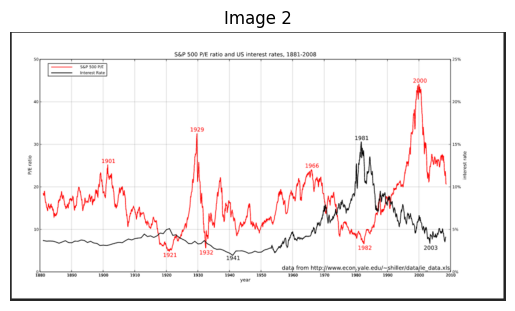


Analyzing image 3...

Assistant: ภาพนี้เป็นภาพร่างของหน้าเว็บไซต์หรือแอปพลิเคชันสำหรับโปรโมทและสมัครสมาชิกรายเดือนของสินค้า หรือบริการที่ชื่อว่า "Awesome Product" โดยมีส่วนประกอบหลักดังนี้:

1. หัวข้อหลักเขียนว่า "Awesome Product" เป็นชื่อของสินค้าหรือบริการ
2. มีช่องให้ใส่อีเมล (Enter Email) และปุ่ม "Go" สำหรับกรอกอีเมลเพื่อลงทะเบียนหรือติดตามข่าวสาร
3. ด้านล่างมีแพ็กเกจบริการ 3 แบบ โดยแต่ละแพ็กเกจมีชื่อและราคาดังนี้:
   - แพ็กเกจชื่อ "Pew" ราคา $2.99 ต่อเดือน
   - แพ็กเกจชื่อ "Bang" ราคา $9.99 ต่อเดือน
   - แพ็กเกจชื่อ "Pow" ราคา $99.99 ต่อเดือน

สรุปคือภาพนี้แสดงถึงการนำเสนอแผนการสมัครสมาชิกหรือราคาแบบต่างๆ ของบริการหรือผลิตภัณฑ์ พร้อมช่องทางให้ผู้ใช้กรอกอีเมลเพื่อติดต่อหรือสมัครสมาชิกต่อไป


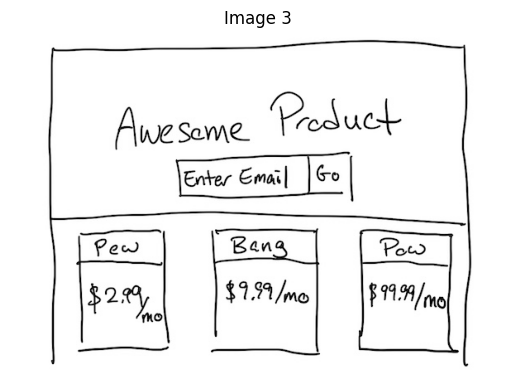

In [15]:
import os
from openai import OpenAI
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Initialize OpenAI client
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# List of image URLs to test
image_urls = [
    "https://github.com/lazyprogrammer/machine_learning_examples/blob/master/openai/physics_problem.jpeg?raw=true",
    "https://github.com/lazyprogrammer/machine_learning_examples/blob/master/openai/finance.png?raw=true",
    "https://github.com/lazyprogrammer/machine_learning_examples/blob/master/openai/webdesign.jpg?raw=true"
]

# Model name
model_name = "gpt-4.1-mini"   # This is the correct model for image analysis

# Iterate over URLs
for idx, url in enumerate(image_urls):
    print(f"\nAnalyzing image {idx + 1}...\n")

    # Call OpenAI API
    response = client.chat.completions.create(
        model=model_name,
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": "What's in this image? analyze this image in thai language"},
                    {"type": "image_url", "image_url": {"url": url}}
                ],
            }
        ]
    )

    # Print result
    print("Assistant:", response.choices[0].message.content)

    # Display the image using matplotlib
    image = Image.open(BytesIO(requests.get(url).content))
    plt.imshow(image)
    plt.title(f"Image {idx + 1}")
    plt.axis('off')
    plt.show()
